In [ ]:
pip install matplotlib pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

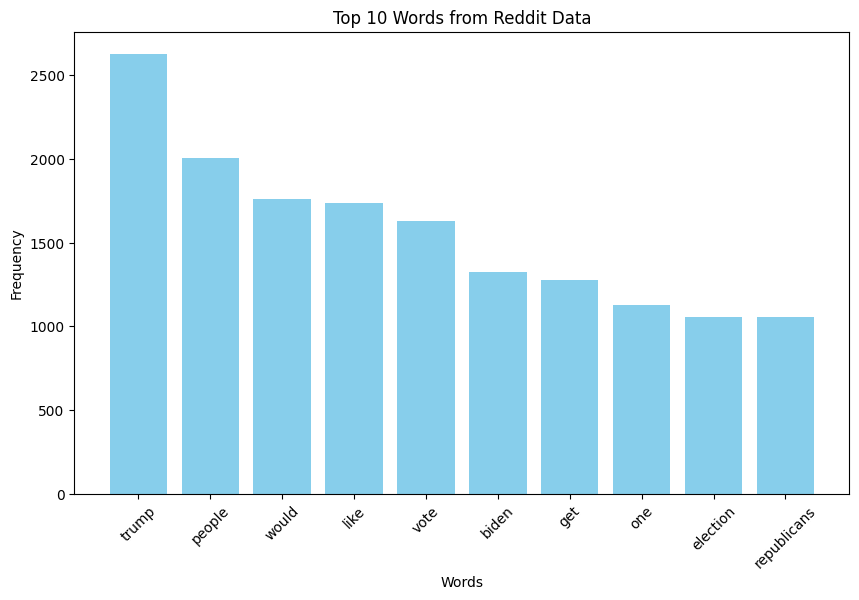

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

#Load the dataset
file_path = '/content/drive/MyDrive/Cloud_computing/Project/reddit_final_data.csv'
data = pd.read_csv(file_path)

# Dropping body column
data = data.drop('Body', axis=1)

# Combine 'Title' and 'Comments'
data['combined_text'] = data['Title'] + ' ' + data['Comments']

# Function to preprocess text data
def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Preprocess the combined text
data['cleaned_text'] = data['combined_text'].apply(preprocess_text)

# Counting word frequencies
all_words = [word for sublist in data['cleaned_text'] for word in sublist]
word_counts = Counter(all_words)

# Selecting top 10 words
top_words = dict(word_counts.most_common(10))

# Plotting the top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words from Reddit Data')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import json

#Path to the file generated by amazon comprehend
output_file_path = '/content/drive/MyDrive/Cloud_computing/Project/output'

# Initialize a list to hold the parsed JSON objects
json_list = []

# Open the file and read line by line
with open(output_file_path, 'r') as file:
    for line in file:
        # Parse each line as a JSON object and add it to the list
        json_obj = json.loads(line.strip())
        json_list.append(json_obj)

# Convert the list of JSON objects to a DataFrame
df = pd.json_normalize(json_list)

# Save the DataFrame to a CSV file
csv_file_path = '/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv'
df.to_csv(csv_file_path, index=False)


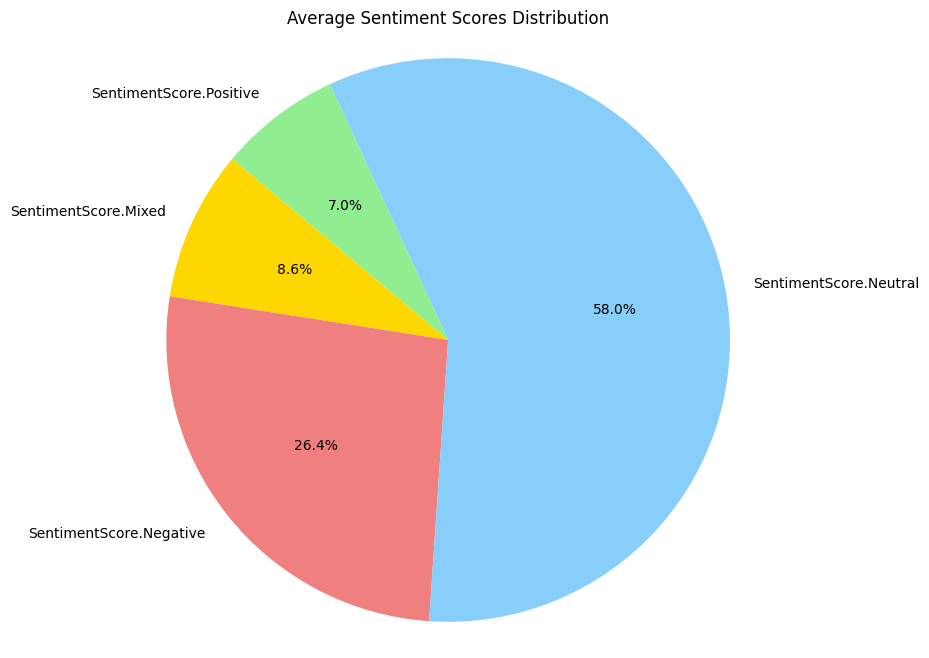

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
sentiment_df = pd.read_csv('/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv')

# Create a pie chart based on the average of each sentiment score type
average_scores = sentiment_df[['SentimentScore.Mixed', 'SentimentScore.Negative',
                               'SentimentScore.Neutral', 'SentimentScore.Positive']].mean()

# Plotting the pie chart
labels = average_scores.index
sizes = average_scores.values
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Sentiment Scores Distribution')
plt.show()


In [ ]:
import re

# Define a small set of English stopwords manually
manual_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

def preprocess_text_simple(text):
    # Simple tokenization based on whitespace and punctuation
    tokens = re.findall(r'\b\w+\b', text.lower())
    return [word for word in tokens if word not in manual_stopwords]

# Apply the new preprocessing function to the combined text
data['cleaned_text'] = data['combined_text'].apply(preprocess_text_simple)

# Tokenize the words in the 'cleaned_text' column
all_cleaned_words = []
for text in data['cleaned_text']:
    all_cleaned_words.extend(text)

# Count the frequency of each word
cleaned_word_freq = pd.Series(Counter(all_cleaned_words)).reset_index()
cleaned_word_freq.columns = ['Word', 'Frequency']

# Rank the words by frequency
cleaned_word_freq['Rank'] = cleaned_word_freq['Frequency'].rank(ascending=False, method='min')

cleaned_word_freq.head()


,Word,Frequency,Rank
0,donald,178,237.0
1,trump,2748,1.0
2,iowa,21,1869.0
3,accuses,3,6586.0
4,biden,1357,6.0


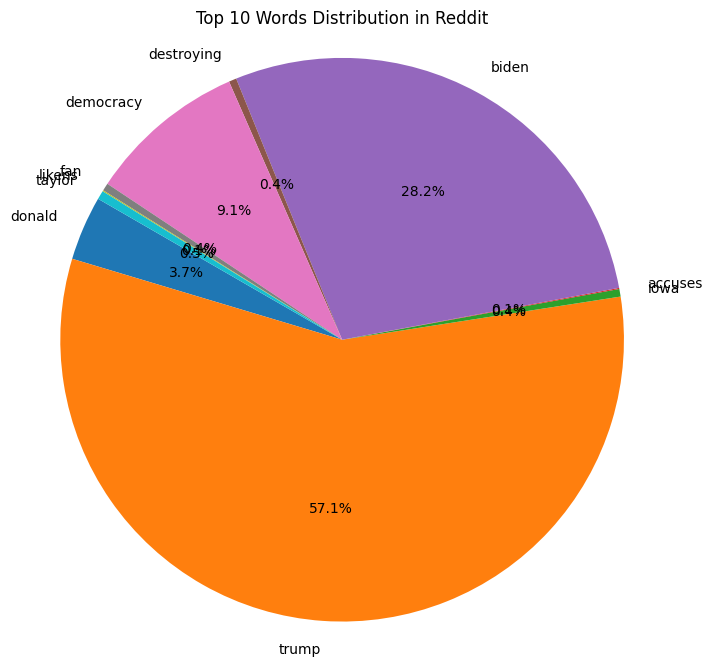

In [ ]:
#Generating top 10 words distribution
top_10_words = cleaned_word_freq.head(10)

# Generate a pie chart
labels = top_10_words['Word']
sizes = top_10_words['Frequency']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=150)
plt.axis('equal')
plt.title('Top 10 Words Distribution in Reddit')
plt.show()

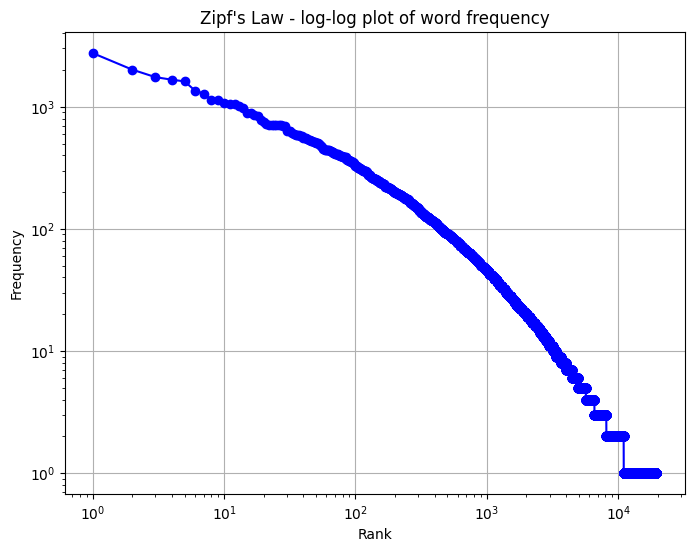

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

word_freq = cleaned_word_freq.sort_values(by='Frequency', ascending=False)
frequencies = word_freq['Frequency'].values
ranks = np.arange(1, len(frequencies) + 1)

# Plotting the frequencies against the ranks
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker='o', linestyle='-', color='b')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law - log-log plot of word frequency')
plt.grid(True)
plt.show()


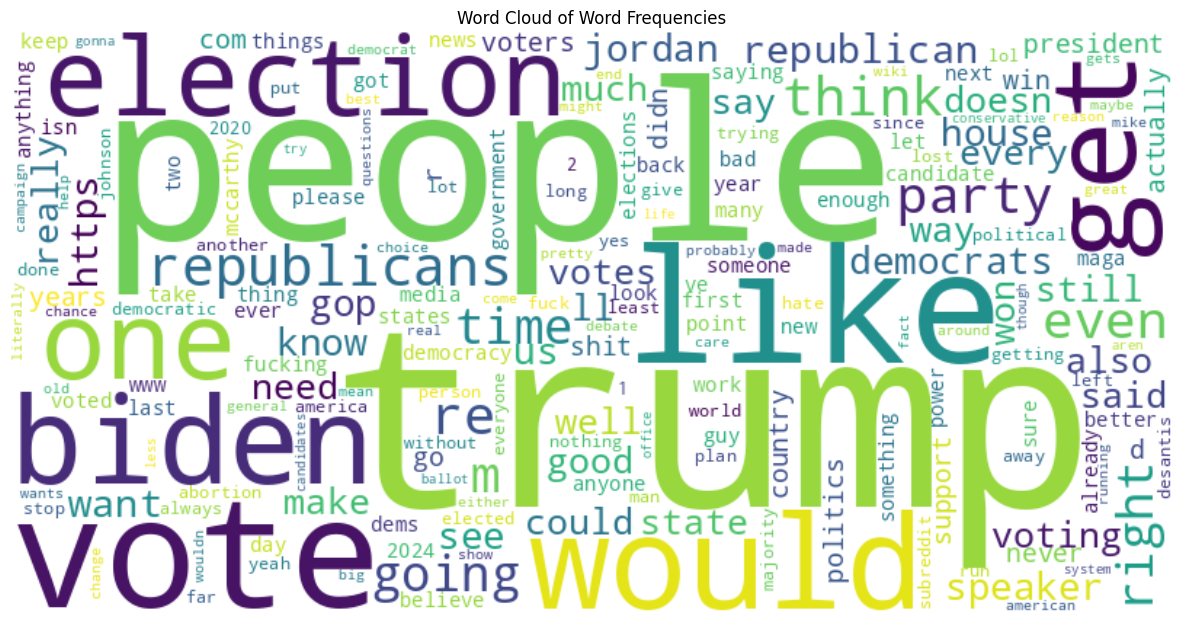

In [ ]:
from wordcloud import WordCloud

# Generating the word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color ='white')

#'word_freq' is a series with words as the index and their frequencies as values
word_freq_dict = word_freq.set_index('Word')['Frequency'].to_dict()
wordcloud.generate_from_frequencies(word_freq_dict)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Word Frequencies')
plt.show()


In [ ]:
#Multinomial Naive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv')

# Combine the sentiment scores into a single text feature
data['CombinedScores'] = data.apply(lambda row: f"Mixed: {row['SentimentScore.Mixed']}, Negative: {row['SentimentScore.Negative']}, Neutral: {row['SentimentScore.Neutral']}, Positive: {row['SentimentScore.Positive']}", axis=1)

# Split the data into features (X) and target labels (y)
X = data['CombinedScores']
y = data['Sentiment']  # 'Sentiment' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#Loading Multinomial Naive Bayes
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Model Accuracy: 0.5918003565062389
Classification Report:
               precision    recall  f1-score   support

       MIXED       1.00      0.03      0.06       163
    NEGATIVE       0.92      0.02      0.04       665
     NEUTRAL       0.59      1.00      0.74      1308
    POSITIVE       1.00      0.03      0.05       108

    accuracy                           0.59      2244
   macro avg       0.88      0.27      0.22      2244
weighted avg       0.74      0.59      0.45      2244



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv')

# Combine the sentiment scores into a single text feature
data['CombinedScores'] = data.apply(lambda row: f"Mixed: {row['SentimentScore.Mixed']}, Negative: {row['SentimentScore.Negative']}, Neutral: {row['SentimentScore.Neutral']}, Positive: {row['SentimentScore.Positive']}", axis=1)

# Split the data into features (X) and target labels (y)
X = data['CombinedScores']
y = data['Sentiment']  # 'Sentiment' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Choose Logistic Regression as the machine learning model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Model Accuracy: 0.5913547237076648
Classification Report:
               precision    recall  f1-score   support

       MIXED       1.00      0.02      0.05       163
    NEGATIVE       0.92      0.02      0.04       665
     NEUTRAL       0.59      1.00      0.74      1308
    POSITIVE       1.00      0.03      0.05       108

    accuracy                           0.59      2244
   macro avg       0.88      0.27      0.22      2244
weighted avg       0.74      0.59      0.45      2244



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv')

# Combine the sentiment scores into a single text feature
data['CombinedScores'] = data.apply(lambda row: f"Mixed: {row['SentimentScore.Mixed']}, Negative: {row['SentimentScore.Negative']}, Neutral: {row['SentimentScore.Neutral']}, Positive: {row['SentimentScore.Positive']}", axis=1)

# Split the data into features (X) and target labels (y)
X = data['CombinedScores']
y = data['Sentiment']  # 'Sentiment' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Choose Random Forest as the machine learning model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Model Accuracy: 0.5918003565062389
Classification Report:
               precision    recall  f1-score   support

       MIXED       1.00      0.03      0.06       163
    NEGATIVE       0.92      0.02      0.04       665
     NEUTRAL       0.59      1.00      0.74      1308
    POSITIVE       1.00      0.03      0.05       108

    accuracy                           0.59      2244
   macro avg       0.88      0.27      0.22      2244
weighted avg       0.74      0.59      0.45      2244



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = pd.read_csv('/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv')

# Combine the sentiment scores into a single text feature
data['CombinedScores'] = data.apply(lambda row: f"Mixed: {row['SentimentScore.Mixed']}, Negative: {row['SentimentScore.Negative']}, Neutral: {row['SentimentScore.Neutral']}, Positive: {row['SentimentScore.Positive']}", axis=1)

# Split the data into features (X) and target labels (y)
X = data['CombinedScores']
y = data['Sentiment']  # 'Sentiment' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Initialize and train the Naive Bayes (MultinomialNB) model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set for each model
y_pred_logistic_regression = logistic_regression_model.predict(X_test_tfidf)
y_pred_naive_bayes = naive_bayes_model.predict(X_test_tfidf)
y_pred_random_forest = random_forest_model.predict(X_test_tfidf)

# Calculate accuracy for each model
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

# Print the accuracy for each model
print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("Naive Bayes Accuracy:", accuracy_naive_bayes)
print("Random Forest Accuracy:", accuracy_random_forest)


Logistic Regression Accuracy: 0.5913547237076648
Naive Bayes Accuracy: 0.5918003565062389
Random Forest Accuracy: 0.5918003565062389


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer
import nltk

data = pd.read_csv('/content/drive/MyDrive/Cloud_computing/Project/sentiment_data.csv')

# Check if the required columns exist in the DataFrame
required_columns = ['SentimentScore.Mixed', 'SentimentScore.Negative', 'SentimentScore.Neutral', 'SentimentScore.Positive']
if all(column in data.columns for column in required_columns):
    # Combine the sentiment scores into a single text feature
    data['CombinedScores'] = data.apply(lambda row: f"Mixed: {row['SentimentScore.Mixed']}, Negative: {row['SentimentScore.Negative']}, Neutral: {row['SentimentScore.Neutral']}, Positive: {row['SentimentScore.Positive']}", axis=1)
else:
    # Handle missing columns appropriately
    raise KeyError("One or more required columns are missing from the dataset.")

# Preprocessing: Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
data['CombinedScores'] = data.apply(lambda row: " ".join([lemmatizer.lemmatize(w) for w in row['CombinedScores'].split()]), axis=1)

# Split the data into features (X) and target labels (y)
X = data['CombinedScores']
y = data['Sentiment']  # 'Sentiment' is the target variable

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Hyperparameter tuning setup
param_grid_lr = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [10, 100, 1000]}
param_grid_nb = {'alpha': [0.1, 1, 10]}

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(random_state=42)

# Grid Search for hyperparameter tuning
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5)
grid_search_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=5)
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# Train models with cross-validation
scores_lr = cross_val_score(grid_search_lr, X_tfidf, y, cv=5)
scores_nb = cross_val_score(grid_search_nb, X_tfidf, y, cv=5)
scores_rf = cross_val_score(grid_search_rf, X_tfidf, y, cv=5)

# Print cross-validated accuracy for each model
print("Cross-Validated Accuracy - Logistic Regression:", scores_lr.mean())
print("Cross-Validated Accuracy - Naive Bayes:", scores_nb.mean())
print("Cross-Validated Accuracy - Random Forest:", scores_rf.mean())

# Train models on the entire dataset for error analysis
grid_search_lr.fit(X_tfidf, y)
grid_search_nb.fit(X_tfidf, y)
grid_search_rf.fit(X_tfidf, y)

# Error Analysis
print("Classification Report - Logistic Regression:\n", classification_report(y, grid_search_lr.predict(X_tfidf)))
print("Classification Report - Naive Bayes:\n", classification_report(y, grid_search_nb.predict(X_tfidf)))
print("Classification Report - Random Forest:\n", classification_report(y, grid_search_rf.predict(X_tfidf)))


[nltk_data] Downloading package wordnet to /root/nltk_data...


Cross-Validated Accuracy - Logistic Regression: 0.6120182576333739
Cross-Validated Accuracy - Naive Bayes: 0.5945450810324535
Cross-Validated Accuracy - Random Forest: 0.6105921134716603
Classification Report - Logistic Regression:
               precision    recall  f1-score   support

       MIXED       1.00      0.14      0.25       770
    NEGATIVE       1.00      0.09      0.16      3152
     NEUTRAL       0.62      1.00      0.77      6720
    POSITIVE       1.00      0.09      0.17       575

    accuracy                           0.64     11217
   macro avg       0.90      0.33      0.34     11217
weighted avg       0.77      0.64      0.53     11217



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report - Naive Bayes:
               precision    recall  f1-score   support

       MIXED       1.00      0.02      0.04       770
    NEGATIVE       0.72      0.04      0.08      3152
     NEUTRAL       0.61      1.00      0.76      6720
    POSITIVE       0.00      0.00      0.00       575

    accuracy                           0.61     11217
   macro avg       0.58      0.27      0.22     11217
weighted avg       0.64      0.61      0.48     11217

Classification Report - Random Forest:
               precision    recall  f1-score   support

       MIXED       0.99      0.14      0.25       770
    NEGATIVE       0.99      0.09      0.16      3152
     NEUTRAL       0.62      1.00      0.77      6720
    POSITIVE       1.00      0.09      0.17       575

    accuracy                           0.64     11217
   macro avg       0.90      0.33      0.34     11217
weighted avg       0.77      0.64      0.53     11217



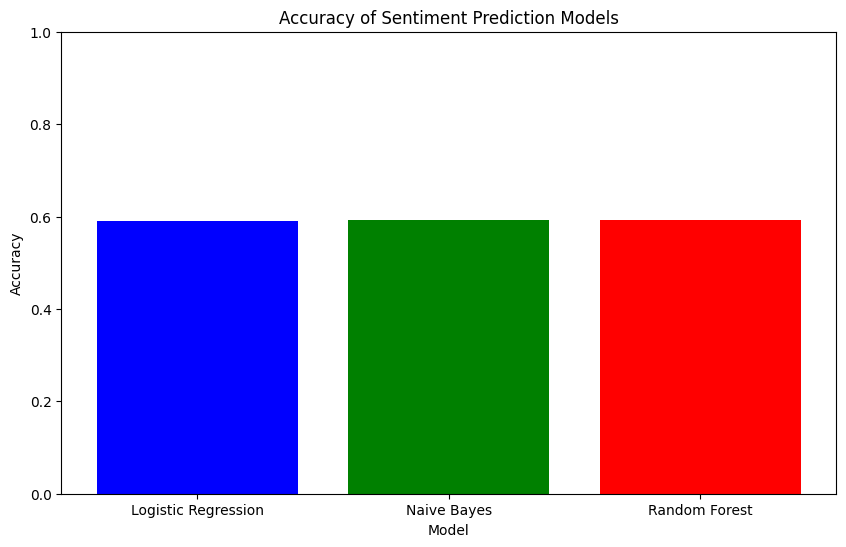

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
accuracy_scores = {
   "Logistic Regression": 0.5913547237076648,
   "Naive Bayes": 0.5918003565062389,
   "Random Forest": 0.5918003565062389
}

# Creating a bar graph
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])

plt.title('Accuracy of Sentiment Prediction Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1 )

# Display the graph
plt.show()



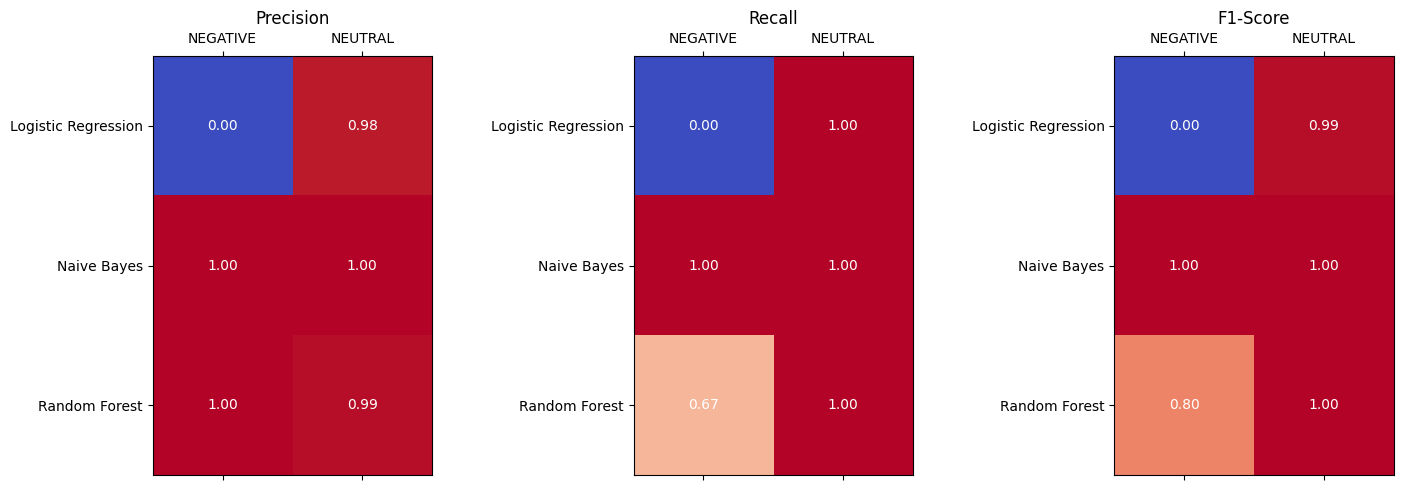

In [ ]:
import numpy as np

# Classification report data for each model
models = ["Logistic Regression", "Naive Bayes", "Random Forest"]
classes = ["NEGATIVE", "NEUTRAL"]

# Precision, Recall, F1-score for Logistic Regression, Naive Bayes, Random Forest
precision = np.array([[0.00, 0.98], [1.00, 1.00], [1.00, 0.99]])
recall = np.array([[0.00, 1.00], [1.00, 1.00], [0.67, 1.00]])
f1_score = np.array([[0.00, 0.99], [1.00, 1.00], [0.80, 1.00]])

# Create subplots
# Adjusting the subplot layout to display the metrics side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Titles for each subplot
titles = ['Precision', 'Recall', 'F1-Score']

# Plotting each metric
for i, metric in enumerate([precision, recall, f1_score]):
    cax = axes[i].matshow(metric, cmap='coolwarm')
    axes[i].set_xticks(range(len(classes)))
    axes[i].set_xticklabels(classes)
    axes[i].set_yticks(range(len(models)))
    axes[i].set_yticklabels(models)
    axes[i].set_title(titles[i])

    # Adding values on the heatmap
    for (j, k), val in np.ndenumerate(metric):
        axes[i].text(k, j, f'{val:.2f}', ha='center', va='center', color='white')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()


